# Tutorial about tracking LocData objects

Tracking refers to link localizations that are close in space over multiple frames and collect those localizations in individual tracks.
We here make use of the trackpy package through wrapper functions to deal with LocData objects.

## Setting things up

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import locan as lc

In [2]:
lc.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


### Sample data:

A random dataset is created.

In [3]:
dat = lc.simulate_tracks(n_walks=5, n_steps=100, ranges=((0,1000),(0,1000)),
                      diffusion_constant=1, seed=1)

dat.print_meta()

identifier: "1"
creation_date: "2021-03-04 13:48:26 +0100"
source: SIMULATION
state: RAW
history {
  name: "simulate_tracks"
  parameter: "{\'n_steps\': 100, \'ranges\': ((0, 1000), (0, 1000)), \'diffusion_constant\': 1, \'time_step\': 10, \'seed\': 1, \'n_walks\': 5}"
}
element_count: 500
frame_count: 100



In [4]:
dat.data.head()

,position_x,position_y,frame
0,410.697449,98.663150,0
1,404.372894,92.338595,1
2,410.697449,86.014039,2
3,404.372894,79.689484,3
4,410.697449,73.364929,4


### Show scatter plots

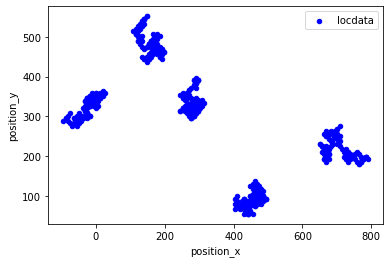

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
dat.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

## Track locdata

The track function collects tracks in a new locdata object.

In [6]:
tracks, track_numbers = lc.track(dat, search_range=500)

Frame 99: 5 trajectories present.


In [7]:
tracks.print_summary()

identifier: "7"
comment: ""
creation_date: "2021-03-04 13:48:28 +0100"
modification_date: ""
source: DESIGN
state: RAW
element_count: 5
frame_count: 1
file_type: UNKNOWN_FILE_TYPE
file_path: ""



In [8]:
tracks.data

,localization_count,position_x,position_y,region_measure_bb,localization_density_bb,subregion_measure_bb,frame
0,100,452.439514,87.405442,7280.0,0.013736,341.525987,0
1,100,153.459919,486.449416,10080.0,0.009921,404.771541,0
2,100,711.470116,217.377024,13200.0,0.007576,468.017094,0
3,100,279.184700,334.786832,7040.0,0.014205,341.525987,0
4,100,-24.424900,325.575132,10640.0,0.009398,417.420651,0


In [9]:
tracks.references[0].data.head()

,position_x,position_y,frame
0,410.697449,98.663150,0
1,404.372894,92.338595,1
2,410.697449,86.014039,2
3,404.372894,79.689484,3
4,410.697449,73.364929,4


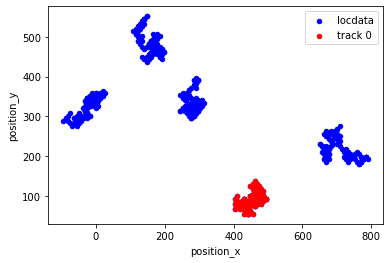

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
dat.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
tracks.references[0].data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', label='track 0')
plt.show()

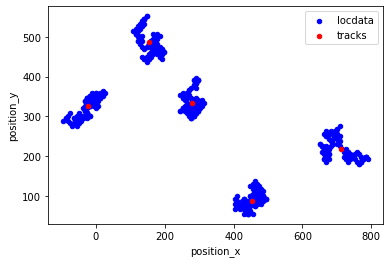

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
dat.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
tracks.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', label='tracks')
plt.show()

To show individual tracks make use of the reference attribute.

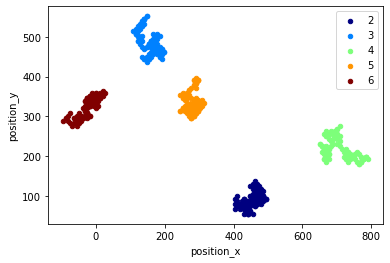

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(tracks))))

for ref in tracks.references:
    c=next(colors)
    ref.data.plot.scatter(x='position_x', y='position_y', ax=ax, color=(c,), label=ref.meta.identifier)

plt.show()

Alternatively a pandas DataFrame is generated by using the link_locdata method.

In [13]:
links = lc.link_locdata(dat, search_range=10)

Frame 99: 5 trajectories present.


In [14]:
links.head()

0      0
400    1
100    2
300    3
200    4
Name: track, dtype: int64

Use the following to add particle column to original locdata dataset.

In [15]:
dat.data.loc[links.index,'track']=links

In [16]:
dat.data.head()

,position_x,position_y,frame,track
0,410.697449,98.663150,0,0
1,404.372894,92.338595,1,0
2,410.697449,86.014039,2,0
3,404.372894,79.689484,3,0
4,410.697449,73.364929,4,0


## Track using trackpy with locdata.data as input

For a detailed tracking analysis you might want to use trackpy functions with the pandas DataFrame carrying localization data as input.

In [17]:
import trackpy as tp

In [18]:
t = tp.link_df(dat.data, search_range=100, memory=1, pos_columns=['position_x', 'position_y'], t_column='frame')

t.head(10)

Frame 99: 5 trajectories present.


,position_x,position_y,frame,track,particle
0,410.697449,98.663150,0,0,0
400,140.431335,545.141289,0,1,1
100,726.649049,192.584767,0,2,2
300,296.008017,390.442919,0,3,3
200,-6.210181,351.885282,0,4,4
1,404.372894,92.338595,1,0,0
401,146.755891,551.465845,1,1,1
101,732.973604,198.909322,1,2,2
201,-12.534736,345.560727,1,4,4
301,289.683462,396.767474,1,3,3


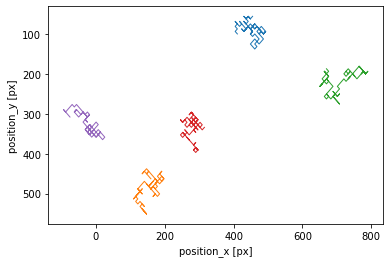

<AxesSubplot:xlabel='position_x [px]', ylabel='position_y [px]'>

In [19]:
plt.figure()
tp.plot_traj(t, pos_columns=['position_x', 'position_y'], t_column='frame');

## filter

In [20]:
t.head()

,position_x,position_y,frame,track,particle
0,410.697449,98.663150,0,0,0
400,140.431335,545.141289,0,1,1
100,726.649049,192.584767,0,2,2
300,296.008017,390.442919,0,3,3
200,-6.210181,351.885282,0,4,4


In [21]:
t1 = tp.filter_stubs(t, 10).reset_index(drop=True)
len(t1)

500

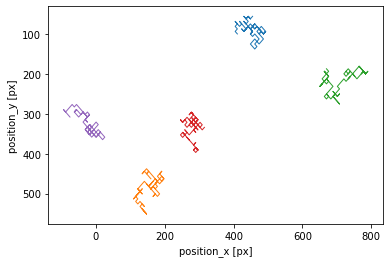

<AxesSubplot:xlabel='position_x [px]', ylabel='position_y [px]'>

In [22]:
plt.figure()
tp.plot_traj(t1, pos_columns=['position_x', 'position_y']);

## drift

In [23]:
d = tp.compute_drift(t1, pos_columns=['position_x', 'position_y'])

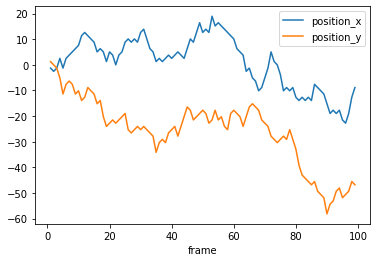

In [24]:
d.plot()
plt.show()

## msd

In [25]:
em = tp.emsd(t1,0.1, 100, pos_columns=['position_x', 'position_y']) # microns per pixel = 100/285., frames per second = 24

[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

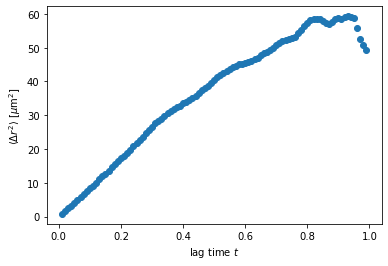

In [26]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
#ax.set(ylim=(1e-2, 10));